# matplotlib and the van der Waals Equation of State isotherms.
This notebook intends to present van der Waals's Equation of State([wikipedia](https://en.wikipedia.org/wiki/Van_der_Waals_equation),[nobel prize lecture](http://www.nobelprize.org/nobel_prizes/physics/laureates/1910/waals-lecture.pdf)), and its isotherms in the Pressure-Volume diagram.

> **Here you will meet the following topics:**
>- Thermodynamics: `EoS isotherms`
>- Python: `matplotlib.pyplot` `numpy.arange`
>- Jupyter Notebook: `magic command`, `interactive figures`


Supose you have to solve the following assignment in a thermodynamics course:
>"Plot the isotherm of van de Waals - EoS for some pure component at differnte values of T and comment on the sub-critical and super-critical behavior"

In [1]:
%matplotlib inline
#this is an Ipython "magic command". This performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with matplotlib;
#With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

#you can try commenting the previous magic command and enabling the following
#%matplotlib notebook
#this command that allows interactive figures if your environment allows it.


Here we will use some resources of the packages numpy and matplotlib

numpy is "the fundamental package for scientific computing with Python"

To import a module into our notebook we use the following syntax:

In [2]:
import numpy as numpy #this line imports the module numpy "the fundamental package for scientific computing with Python"
#import <-- keyword import
       #numpy <-- name of the module
             #as <-- keyword "as"
                #numpy <-- the alias name that we wish to use to refer to that module

We will also use matplotlib, a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.
Specifically the pyplot interface.

In [3]:
import matplotlib as matplotlib

Consider the *van der Waals* equation of state (Reid et al., 1987, see Eq 3-6.1 and Table 3-5, line 1)

$P=\frac{RT}{{\bar{V}}-b}-\frac{a}{{\bar{V}}^2}$

$a=\frac{27}{64}\frac{{{Tc}^2}{R^2}}{Pc}$


$b=\frac{{R}{Tc}}{{8}{Pc}}$

where $R$ is the gas constant 

$R = 8.3144598 \mathrm{{J} {mol^{−1}} {K^{−1}}}$

and critical properties for hexane are 

$Tc = 507.5 \mathrm{K}$


$Pc = 30.1 \times {10^6} \mathrm{Pa}$

So lets code this information:

First the gas constant

In [4]:
#gas constant
R = 8.3144598 #J.mol^−1.K^−1

now the physical properties of the substance

In [5]:
#pure component critical point of hexane
# Tc (K)
Tc = 507.5 #K

# Pc (bar)
Pc = 30.1*(10**6) #Pa

Then the EoS parameters

In [6]:
a = 27/64*((Tc**2)*(R**2)/Pc)
print(a)

0.2495499363743344


In [7]:
b = (R*Tc)/(8*Pc)
print(b)

1.752320742732558e-05


and the explixt eos representation

In [8]:
def Pressure_van_Der_waals(T,Vm):
#define function to calc Pressure from T and V
    P = R*T/(Vm-b) - a/(Vm**2)
#note that T and Vm used inside the function are the dummy argumets, i.e., the values used in the calculation are the values provided in when calling the function
#while a and b are assumed known from the 'namespace' that encompasses that function, in this case, that is the namespace of the python code cells in whole jupyter notebook being run  
#its functioning is quite simple here, however requires further comprehension when dealing with different python files and importing different modules.
    return P

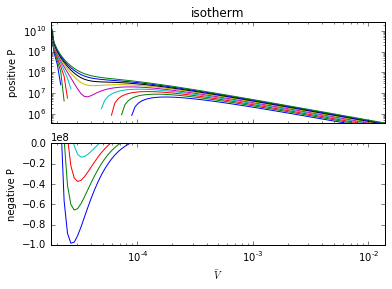

In [9]:
for T in numpy.linspace(277.5, 607.5, 9):
#--------numpy.linspace <-- remember in course 1 we used the function "range" from python, that functio works only for integers
#here we want to make a range of real values, for that we have to use the functions numpy.arange or numpy.linspace
#numpy.linspace works in the following way: we provide a initial value, and end value and the number of values, and it returns us a list with the desired number of values equally spaced in the desired interval
    
    #array of values for volume
    Vmi = numpy.exp(numpy.linspace(numpy.log((R*Tc)/(8*Pc)*1.01),numpy.log((R*Tc/Pc)*100.),100))
    #here we use numpy.log the logarithm function and the linspace function to create a list that is equally spaced in the logarithm scale
    #and the numpy.exp,  the numpy exponencial to recover the values displayed in the original scale

    matplotlib.pyplot.figure(1) #activate a figure
    matplotlib.pyplot.subplot(211) #activate a subplot

    matplotlib.pyplot.loglog(Vmi,Pressure_van_Der_waals(T,Vmi), label=str(T)+'K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
    matplotlib.pyplot.ylabel('positive P') #create labels to be displayed in the plot
    matplotlib.pyplot.title('isotherm') #create a title
    matplotlib.pyplot.ylim([Pressure_van_Der_waals(T,(R*Tc/Pc)*100.),Pressure_van_Der_waals(T,(R*Tc)/(8*Pc)*1.01)]) #define max and min limits of the y axis only to the positive pressure range
    matplotlib.pyplot.xlim([(R*Tc)/(8*Pc)*1.01,(R*Tc/Pc)*100.]) #define max and min limits of the x axis

    matplotlib.pyplot.tick_params( # choose some formatting to the ticks
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='on',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

    matplotlib.pyplot.subplot(212) #activate a second subplot

    matplotlib.pyplot.semilogx(Vmi,Pressure_van_Der_waals(T,Vmi), label=str(T)+'K') #plot linear P vs log V

    matplotlib.pyplot.xlabel(r'$\bar{V}$') #use matplotlib's  mathtext to create special symbols in the x label
    matplotlib.pyplot.ylabel('negative P') #y label for the second subplot
    matplotlib.pyplot.ylim([-100000000,0.]) #define max and min limits of the y axis only to the negative pressure range
    matplotlib.pyplot.xlim([(R*Tc)/(8*Pc)*1.01,(R*Tc/Pc)*100.]) #define same limits of the x axis
        
matplotlib.pyplot.show() #finally show the plot. It shows in the output section of the cell if the magic command %matplotlib inline was used in the beginning of the notebook


# External references:
* matplotlib magic command http://ipython.readthedocs.io/en/stable/interactive/plotting.html
* matplotlib, pyplot [tutorial](http://matplotlib.org/users/pyplot_tutorial.html)

# Credits
* Initially developed in python 2.7 by Guilherme Carneiro Queiroz da Silva
* Adapted to ipynb with python 3.5 by Iuri Soter Viana Segtovich